In [1]:
# import preprocessing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
train = pd.read_csv('train_data.csv')
test =  pd.read_csv('test_data.csv')
ss =  pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDescription.csv')

In [81]:
variables

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [3]:
print('Train data shape: ', train.shape)
print('Test data shape: ', test.shape)

Train data shape:  (7160, 14)
Test data shape:  (3069, 13)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [5]:
train.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [6]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


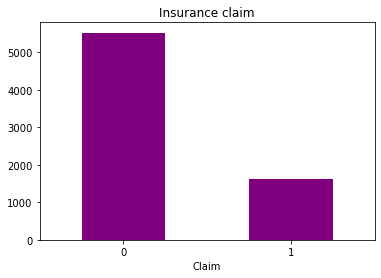

In [7]:
train['Claim'].value_counts().plot(kind = 'bar', color = 'purple')
plt.title('Insurance claim')
plt.xlabel('Claim')
plt.xticks(rotation = 0)
plt.show()

In [8]:
# Dropping not so useful features\

In [9]:
train.drop(['Customer Id', 'Garden', 'Building_Painted', 'NumberOfWindows'], axis=1, inplace=True)

In [10]:
test.drop(['Customer Id', 'Garden', 'Building_Painted', 'NumberOfWindows'], axis=1, inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Fenced     7160 non-null   object 
 4   Settlement          7160 non-null   object 
 5   Building Dimension  7054 non-null   float64
 6   Building_Type       7160 non-null   int64  
 7   Date_of_Occupancy   6652 non-null   float64
 8   Geo_Code            7058 non-null   object 
 9   Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 559.5+ KB


In [12]:
#train['Date_of_Occupancy'].median()

In [13]:
### Filling null columns

In [14]:
# train['Garden'] = train['Garden'].fillna(train['Garden'].mode()[0])
train['Building Dimension'] = train['Building Dimension'].fillna(train['Building Dimension'].mode()[0])
train['Date_of_Occupancy'] = train['Date_of_Occupancy'].fillna(train['Date_of_Occupancy'].mode()[0])
train['Geo_Code'] = train['Geo_Code'].fillna(train['Geo_Code'].mode()[0])

In [15]:
train.isna().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Fenced       0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
Geo_Code              0
Claim                 0
dtype: int64

In [16]:
test.isna().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Fenced         0
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
Geo_Code               13
dtype: int64

In [17]:
# test['Garden'] = test['Garden'].fillna(test['Garden'].mode()[0])
test['Building Dimension'] = test['Building Dimension'].fillna(test['Building Dimension'].mode()[0])
test['Date_of_Occupancy'] = test['Date_of_Occupancy'].fillna(test['Date_of_Occupancy'].mode()[0])
test['Geo_Code'] = test['Geo_Code'].fillna(test['Geo_Code'].mode()[0])

In [18]:
test.isna().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Fenced       0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
Geo_Code              0
dtype: int64

### Encoding categorical data

In [19]:
# import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [20]:
lab_enc = LabelEncoder()
lab_bin = LabelBinarizer()

In [21]:
#train['Building_Painted'] = lab_bin.fit_transform(train['Building_Painted'])
train['Building_Fenced'] = lab_bin.fit_transform(train['Building_Fenced'])
#train['Garden'] = lab_bin.fit_transform(train['Garden'])
train['Settlement'] = lab_bin.fit_transform(train['Settlement'])
#train['NumberOfWindows'] = lab_enc.fit_transform(train['NumberOfWindows'])
train['Geo_Code'] = lab_enc.fit_transform(train['Geo_Code'])

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Fenced     7160 non-null   int32  
 4   Settlement          7160 non-null   int32  
 5   Building Dimension  7160 non-null   float64
 6   Building_Type       7160 non-null   int64  
 7   Date_of_Occupancy   7160 non-null   float64
 8   Geo_Code            7160 non-null   int32  
 9   Claim               7160 non-null   int64  
dtypes: float64(3), int32(3), int64(4)
memory usage: 475.6 KB


In [23]:
#test['Building_Painted'] = lab_bin.fit_transform(test['Building_Painted'])
test['Building_Fenced'] = lab_bin.fit_transform(test['Building_Fenced'])
#test['Garden'] = lab_bin.fit_transform(test['Garden'])
test['Settlement'] = lab_bin.fit_transform(test['Settlement'])
#test['NumberOfWindows'] = lab_enc.fit_transform(test['NumberOfWindows'])
test['Geo_Code'] = lab_enc.fit_transform(test['Geo_Code'])

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   3069 non-null   int64  
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   int64  
 3   Building_Fenced     3069 non-null   int32  
 4   Settlement          3069 non-null   int32  
 5   Building Dimension  3069 non-null   float64
 6   Building_Type       3069 non-null   int64  
 7   Date_of_Occupancy   3069 non-null   float64
 8   Geo_Code            3069 non-null   int32  
dtypes: float64(3), int32(3), int64(3)
memory usage: 179.9 KB


### Splitting the dataset

In [25]:
X = train.drop('Claim', axis=1)
y = train['Claim']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Model Building

In [28]:
from sklearn.metrics import accuracy_score, f1_score

#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
random_prediction = random_forest.predict(X_test)

In [32]:
random_acc = round((accuracy_score(y_test, random_prediction) * 100), 2)
random_f1 = round((f1_score(y_test, random_prediction)), 4)

In [33]:
print(f'The Random Forest classifier has an accuracy of {random_acc}% and f1 score of {random_f1}')

The Random Forest classifier has an accuracy of 76.82% and f1 score of 0.3439


#### Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
gradient_boost = GradientBoostingClassifier()

gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [36]:
gradient_pred = gradient_boost.predict(X_test)

In [37]:
gradient_acc = round((accuracy_score(y_test, gradient_pred)*100), 2)
gradient_f1 = round((f1_score(y_test, gradient_pred)), 4)

In [38]:
print('accuracy score: ', gradient_acc)
print('f1_score: ', gradient_f1)

accuracy score:  78.14
f1_score:  0.2805


#### SVC

In [39]:
from sklearn.svm import SVC

In [40]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

SVC()

In [41]:
svm_prediction = svm_model.predict(X_test)

In [42]:
svm_acc = round((accuracy_score(y_test, svm_prediction)* 100), 2)
svm_f1 = round((f1_score(y_test, svm_prediction)), 4)

In [43]:
print('accuracy score: ', svm_acc)
print('f1_score: ', svm_f1)

accuracy score:  77.3
f1_score:  0.1688


#### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KNN_model = KNeighborsClassifier()

KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
KNN_prediction = KNN_model.predict(X_test)

In [47]:
KNN_acc = round((accuracy_score(y_test, KNN_prediction)*100), 2)
KNN_f1 = round((f1_score(y_test, KNN_prediction)), 4)

In [48]:
print('accuracy score: ', KNN_acc)
print('f1_score: ', KNN_f1)

accuracy score:  75.14
f1_score:  0.348


#### Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
naive_model = GaussianNB()

naive_model.fit(X_train, y_train)

GaussianNB()

In [51]:
naive_prediction = naive_model.predict(X_test)

In [52]:
naive_acc = round((accuracy_score(y_test, naive_prediction)*100), 2)
naive_f1 = round((f1_score(y_test, naive_prediction)), 4)

In [53]:
print('accuracy score: ', naive_acc)
print('f1_score: ', naive_f1)

accuracy score:  77.23
f1_score:  0.2974


#### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
decision_model = DecisionTreeClassifier()

decision_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
decision_prediction = decision_model.predict(X_test)

In [57]:
decision_acc = round((accuracy_score(y_test, decision_prediction)*100), 2)
decision_f1 = round((f1_score(y_test, decision_prediction)), 4)

In [58]:
print('accuracy score: ', decision_acc)
print('f1_score: ', decision_f1)

accuracy score:  68.16
f1_score:  0.3596


In [59]:
ss.head()

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1


In [65]:
test2 = pd.read_csv('test_data.csv')

In [66]:
final_pred_naive = naive_model.predict(test)

In [67]:
final_naive_prediction = pd.DataFrame({'Customer Id': test2['Customer Id'],
                           'Claim':final_pred_naive})

In [68]:
final_naive_prediction.to_csv('Insurance Prediction naive.csv', index=False)

In [ ]:
# gradient boost

In [69]:
grad_final_pred = gradient_boost.predict(test)

final_gradient_prediction = pd.DataFrame({'Customer Id': test2['Customer Id'],
                           'Claim':grad_final_pred})

final_gradient_prediction.to_csv('Insurance Prediction gradient.csv', index=False)

In [70]:
KNN_final_pred = KNN_model.predict(test)

final_KNN_prediction = pd.DataFrame({'Customer Id': test2['Customer Id'],
                           'Claim':KNN_final_pred})

final_KNN_prediction.to_csv('Insurance Prediction KNN.csv', index=False)

In [71]:
random_final_pred = random_forest.predict(test)

final_random_prediction = pd.DataFrame({'Customer Id': test2['Customer Id'],
                           'Claim':random_final_pred})

final_random_prediction.to_csv('Insurance Prediction random.csv', index=False)

In [72]:
svm_final_pred = svm_model.predict(test)

final_svm_prediction = pd.DataFrame({'Customer Id': test2['Customer Id'],
                           'Claim':svm_final_pred})

final_svm_prediction.to_csv('Insurance Prediction svm.csv', index=False)

In [73]:
decision_final_pred = decision_model.predict(test)

final_decision_prediction = pd.DataFrame({'Customer Id': test2['Customer Id'],
                           'Claim':decision_final_pred})

final_decision_prediction.to_csv('Insurance Prediction decision.csv', index=False)

### Pickling the required model

In [74]:
import pickle
filename = 'insurance_prediction.sav'
pickle.dump(decision_model, open(filename, 'wb'))

In [77]:
X.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential', 'Building_Fenced',
       'Settlement', 'Building Dimension', 'Building_Type',
       'Date_of_Occupancy', 'Geo_Code'],
      dtype='object')

In [78]:
X.head()

,YearOfObservation,Insured_Period,Residential,Building_Fenced,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code
0,2013,1.0,0,1,1,290.0,1,1960.0,7
1,2015,1.0,0,0,0,490.0,1,1850.0,7
2,2014,1.0,0,1,1,595.0,1,1960.0,7
3,2013,1.0,0,1,1,2840.0,1,1960.0,7
4,2014,1.0,0,0,0,680.0,1,1800.0,7
